# Markov Processes
Following Ashwin Rao's book (Chapter 3).

In [12]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from dataclasses import dataclass

## Stock Simulation (Process 1)
This is a random walk that tends to a fixed mean.

In [1]:
@dataclass
class Process1:
    """Simulates a stock price X whose next state are X-1 or X+1. The probability p(X|X-1)
    is a logistic function with coefficient alpha1."""
    @dataclass
    class State:
        price: int
    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)
    def up_prob(self, state: State) -> float:
        return 1. / (1 + np.exp(-self.alpha1 * (self.level_param - state.price)))
    def next_state(self, state: State) -> State:
        up_move: int = np.random.binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price=state.price + up_move * 2 - 1)

In [2]:
def simulation(process, start_state):
    state = start_state
    while True:
        yield state
        state = process.next_state(state)

In [4]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process1(level_param=level_param, alpha1=alpha1)
    start_state = Process1.State(price=start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [9]:
x = process1_price_traces(90, 100, 0.25, 100, 5)

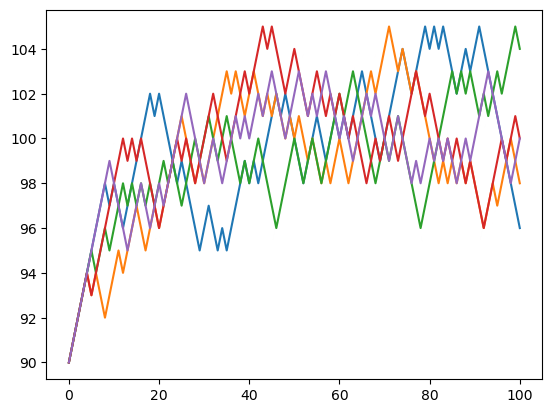

In [15]:
plt.plot(x.T)